In [2]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# creating empty reviews list
iphone14_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B0BDJH6GL8'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)
    iphone14_reviews=iphone14_reviews+ip

# writng reviews in a text file
with open("iphone14.txt","w",encoding='utf8') as output:
    output.write(str(iphone14_reviews))

In [31]:
iphone14_reviews

['\nApple hasn’t made any bones about the fact that there are certain products it has that aren’t meant for everyone. Some of these — like the Mac Studio or even the Mac mini — are way too niche and will be sought by those who really need them. And then there are those that bring the best of Apple at an expensive — very expensive — price point but are desired by many. The iPhone’s Pro models have always been in the category — the coveted one, the desirable one, the one that makes you want to junk that financial prudence that has been drilled in you. The iPhone 14 Pro Max is very much that phone — the best of Apple and by now you know that it is an expensive phone. Rs 1,39,900 is the starting price and there’s little point in debating on why it’s so expensive and whether it’s value for money or not. It’s an Apple product, it is an iPhone, and it is the Pro Max variant — of course it will be expensive. Apple wants your money and the iPhone 14 Pro Max is that dangling proposition that may

In [32]:
 # Joinining all the reviews
ip_rev_string = " ".join(iphone14_reviews)


In [33]:
# Removing unwanted symbols
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [34]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)

['', 'apple', 'hasn', 't', 'made', 'any', 'bones', 'about', 'the', 'fact', 'that', 'there', 'are', 'certain', 'products', 'it', 'has', 'that', 'aren', 't', 'meant', 'for', 'everyone', 'some', 'of', 'these', 'like', 'the', 'mac', 'studio', 'or', 'even', 'the', 'mac', 'mini', 'are', 'way', 'too', 'niche', 'and', 'will', 'be', 'sought', 'by', 'those', 'who', 'really', 'need', 'them', 'and', 'then', 'there', 'are', 'those', 'that', 'bring', 'the', 'best', 'of', 'apple', 'at', 'an', 'expensive', 'very', 'expensive', 'price', 'point', 'but', 'are', 'desired', 'by', 'many', 'the', 'iphone', 's', 'pro', 'models', 'have', 'always', 'been', 'in', 'the', 'category', 'the', 'coveted', 'one', 'the', 'desirable', 'one', 'the', 'one', 'that', 'makes', 'you', 'want', 'to', 'junk', 'that', 'financial', 'prudence', 'that', 'has', 'been', 'drilled', 'in', 'you', 'the', 'iphone', 'pro', 'max', 'is', 'very', 'much', 'that', 'phone', 'the', 'best', 'of', 'apple', 'and', 'by', 'now', 'you', 'know', 'that', '

!python -m spacy download en_core_web_md if package is not installed

In [36]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=iphone14_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [37]:
with open("/content/drive/MyDrive/Assignment-Data Science/11.Text Mining/data_set/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [38]:
# Joinining all the reviews into single paragraph
ip_rev_para = " ".join(ip_reviews_words)

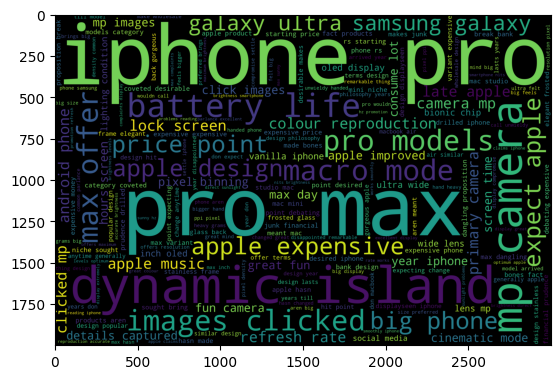

In [39]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [14]:
# positive words # Choose the path for +ve words stored in system
with open("/content/drive/MyDrive/Assignment-Data Science/11.Text Mining/data_set/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")


In [15]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

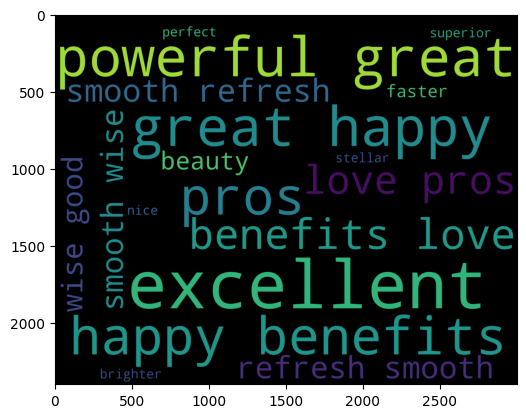

In [16]:

# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [23]:
# negative words  Choose path for -ve words stored in system
with open("/content/drive/MyDrive/Assignment-Data Science/11.Text Mining/data_set/negative-words.txt","r", encoding="ISO-8859-1") as neg:
  negwords = neg.read().split("\n")

In [24]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])



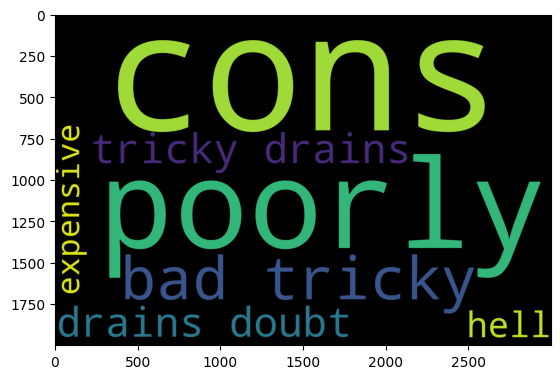

In [25]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)